<a href="https://colab.research.google.com/github/Ger-oc/XAi/blob/main/Assignment_3_19192118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### <div>
<img src="https://www.ul.ie/themes/custom/ul/logo.svg" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2024/25

### CS6462 Assignment 3 - Causal Graphical Model vs Bayesian Graphical Model

### Instructor: Emil Vassev
April 8th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red"> Gerard</span>
### Student Surname: <span style="color:red"> O Connell</span>
### Student ID: <span style="color:red">: 19192118</span>
### Date of Final Submission: <span style="color:red"> 22/04/2025</span>
***

## Task
In this e-tivity, you are asked to build a Causal Graphical Model by using the <b>causalgraphicalmodels</b> library and do interventions on this model. Then you are asked to build the same model but as a Bayesian Network by using the <b>BayesianNetwork</b> construct of the <b>pgmpy.models</b> library. Both models need to cover a real-life scenario targeting getting late at work.

## The real-life scenario

Here, you can find a set of random variables X = {X1, X2, ... , X12}:
<li>X1 = “late for work”</li>
<li>X2 = “low speed due to long vehicle queues”</li>
<li>X3 = “traffic jam”</li>
<li>X4 = “traffic accident”</li>
<li>X5 = “heavy rain”</li>
<li>X6 = “snow”</li>
<li>X7 = “slippery road”</li>
<li>X8 = “getting up late”</li>
<li>X9 = “road is blocked”</li>
<li>X10 = “taking a longer alternative route”</li>
<li>X11 = “car malfunction”</li>
<li>X12 = “car towing”</li>

Use your logic to build a <b>realistic</b> causal network, which then can be transformed to a Bayesian Network (Causal Bayesian Network). In this network, the parent-child relationships should be deduced based on your logic. You need to use all the random variables.
    
### Here are the steps you need to follow:

## Step 1: Create and Execute the Causal Network (50%)

### Step 1.1. Describe your logic of deducing the causal relationships. (10%)
Outline the problem in terms of:
<li>causal dependencies among the random variables</li>
<li>short rationale on the parent-child relationships</li>    


<span style="color:red">In this causal model, we analyse the factors that may lead someone to be late for work. The central outcome variable is “late for work,” which can be influenced by several real-world conditions involving weather, traffic, personal behaviour, and vehicle reliability. Weather conditions like heavy rain and snow can lead to slippery roads, which in turn increase the likelihood of traffic accidents. Snow can also directly cause car malfunctions due to freezing temperatures. Traffic accidents may result in both traffic jams and road blockages. Traffic jams contribute to lower driving speed, while blocked roads may force a driver to take a longer alternative route. At the same time, car malfunctions can lead to the need for towing services. On the personal side, getting up late independently affects the chance of being late for work. Ultimately, the likelihood of arriving late is influenced by low speed, the need for a longer route, getting up late, car malfunction, and car towing. These relationships form a logical and realistic causal structure that connects environmental, behavioural, and mechanical factors to the final outcome.</span>




### Step 1.2: Create and show the Causal DAG (30%)

In [5]:
!pip install causalgraphicalmodels graphviz
!sed -i 's/from collections import Iterable/from collections.abc import Iterable/' /usr/local/lib/python*/dist-packages/causalgraphicalmodels/cgm.py


In [6]:
import matplotlib.pyplot as plt

from causalgraphicalmodels import CausalGraphicalModel

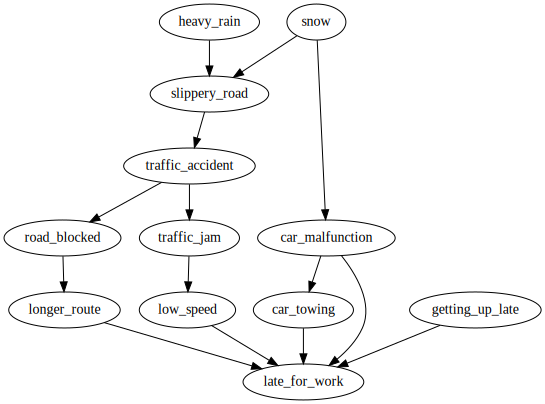

In [12]:
from causalgraphicalmodels import CausalGraphicalModel

causal_dag = CausalGraphicalModel(
    nodes=[
        "late_for_work", "low_speed", "traffic_jam", "traffic_accident", "heavy_rain", "snow",
        "slippery_road", "getting_up_late", "road_blocked", "longer_route", "car_malfunction", "car_towing"
    ],
    edges=[
        ("heavy_rain", "slippery_road"),
        ("snow", "slippery_road"),
        ("snow", "car_malfunction"),
        ("slippery_road", "traffic_accident"),
        ("traffic_accident", "traffic_jam"),
        ("traffic_accident", "road_blocked"),
        ("traffic_jam", "low_speed"),
        ("road_blocked", "longer_route"),
        ("car_malfunction", "car_towing"),
        ("getting_up_late", "late_for_work"),
        ("low_speed", "late_for_work"),
        ("longer_route", "late_for_work"),
        ("car_malfunction", "late_for_work"),
        ("car_towing", "late_for_work")
    ]
)


causal_dag.draw()

### Step 1.3: Show the Joint Distibution of the Causal Network (1%)

In [15]:
print("P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12) = P(X5) * P(X6) * P(X8) * P(X7|X5,X6) * P(X11|X6) * P(X4|X7) * P(X3|X4) * P(X9|X4) * P(X2|X3) * P(X10|X9) * P(X12|X11) * P(X1|X2,X8,X10,X11,X12)")



P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12) = P(X5) * P(X6) * P(X8) * P(X7|X5,X6) * P(X11|X6) * P(X4|X7) * P(X3|X4) * P(X9|X4) * P(X2|X3) * P(X10|X9) * P(X12|X11) * P(X1|X2,X8,X10,X11,X12)


### Step 1.4: Run the intervention do(“road is blocked”) (7%)

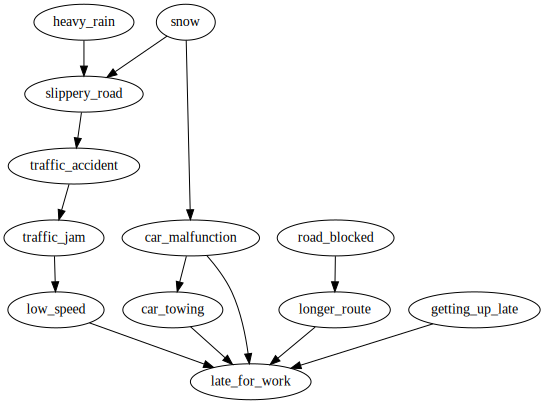

In [13]:
from causalgraphicalmodels import CausalGraphicalModel

nodes = [
    "late_for_work", "low_speed", "traffic_jam", "traffic_accident", "heavy_rain", "snow",
    "slippery_road", "getting_up_late", "road_blocked", "longer_route", "car_malfunction", "car_towing"
]

edges = [
    ("heavy_rain", "slippery_road"),
    ("snow", "slippery_road"),
    ("snow", "car_malfunction"),
    ("slippery_road", "traffic_accident"),
    ("traffic_accident", "traffic_jam"),
    ("traffic_accident", "road_blocked"),
    ("traffic_jam", "low_speed"),
    ("road_blocked", "longer_route"),
    ("car_malfunction", "car_towing"),
    ("getting_up_late", "late_for_work"),
    ("low_speed", "late_for_work"),
    ("longer_route", "late_for_work"),
    ("car_malfunction", "late_for_work"),
    ("car_towing", "late_for_work")
]


intervened_edges = [edge for edge in edges if edge[1] != "road_blocked"]


intervened_graph = CausalGraphicalModel(
    nodes=nodes,
    edges=intervened_edges
)


intervened_graph.draw()


### Step 1.5: Show the Causal DAG with the intervention "on" (1%)

In [ ]:
# Graph above

### Step 1.6: Show the Joint Distibution of the Causal Network with the intervention "on" (1%)

In [16]:
print("P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12 | do(X9)) = P(X5) * P(X6) * P(X8) * P(X7|X5,X6) * P(X11|X6) * P(X4|X7) * P(X3|X4) * P(X2|X3) * P(X9) * P(X10|X9) * P(X12|X11) * P(X1|X2,X8,X10,X11,X12)")


P(X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12 | do(X9)) = P(X5) * P(X6) * P(X8) * P(X7|X5,X6) * P(X11|X6) * P(X4|X7) * P(X3|X4) * P(X2|X3) * P(X9) * P(X10|X9) * P(X12|X11) * P(X1|X2,X8,X10,X11,X12)


***
## Note
In <b>Step 2</b> you need to transform the model, you have built in Step 1, to a Bayesian Network. Here, you will need to repeat some of the activities you have already done in Assignment 2. Please, consider all the random variables <b>X</b> binary and the probability distribution of each variable as <b>{true=50%, false=50%}</b>.
***

## Step 2: Create and Execute the Bayesian Network (50%)

### Step 2.1: Create and show the DAG of the Bayesian Network (20%)

In [18]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 865.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

**Colab doesnt support BayesianNetworks it now uses DiscreteBayesianNetworks**

In [31]:
# use the pgmpy library: "from pgmpy.models import BayesianNetwork"
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

bn_model = DiscreteBayesianNetwork([
    ("heavy_rain", "slippery_road"),
    ("snow", "slippery_road"),
    ("snow", "car_malfunction"),
    ("slippery_road", "traffic_accident"),
    ("traffic_accident", "traffic_jam"),
    ("traffic_accident", "road_blocked"),
    ("traffic_jam", "low_speed"),
    ("road_blocked", "longer_route"),
    ("car_malfunction", "car_towing"),
    ("getting_up_late", "late_for_work"),
    ("low_speed", "late_for_work"),
    ("longer_route", "late_for_work"),
    ("car_malfunction", "late_for_work"),
    ("car_towing", "late_for_work")
])
bn_model.edges()

OutEdgeView([('heavy_rain', 'slippery_road'), ('slippery_road', 'traffic_accident'), ('snow', 'slippery_road'), ('snow', 'car_malfunction'), ('car_malfunction', 'car_towing'), ('car_malfunction', 'late_for_work'), ('traffic_accident', 'traffic_jam'), ('traffic_accident', 'road_blocked'), ('traffic_jam', 'low_speed'), ('road_blocked', 'longer_route'), ('low_speed', 'late_for_work'), ('longer_route', 'late_for_work'), ('car_towing', 'late_for_work'), ('getting_up_late', 'late_for_work')])

### Step 2.2: Create the Conditional Probability Distributions of the Bayesian Network (20%)

#### Step 2.2.1: Build the probability distribution tables with TabularCPD (16%)

In [32]:
cpd_heavy_rain = TabularCPD("heavy_rain", 2, [[0.5], [0.5]])
cpd_snow = TabularCPD("snow", 2, [[0.5], [0.5]])
cpd_getting_up_late = TabularCPD("getting_up_late", 2, [[0.5], [0.5]])

cpd_slippery = TabularCPD("slippery_road", 2,
    [[0.9, 0.7, 0.6, 0.1], [0.1, 0.3, 0.4, 0.9]],
    evidence=["heavy_rain", "snow"], evidence_card=[2, 2]
)

cpd_malfunction = TabularCPD("car_malfunction", 2,
    [[0.8, 0.3], [0.2, 0.7]],
    evidence=["snow"], evidence_card=[2]
)

cpd_accident = TabularCPD("traffic_accident", 2,
    [[0.95, 0.2], [0.05, 0.8]],
    evidence=["slippery_road"], evidence_card=[2]
)

cpd_traffic_jam = TabularCPD("traffic_jam", 2,
    [[0.9, 0.3], [0.1, 0.7]],
    evidence=["traffic_accident"], evidence_card=[2]
)

cpd_road_blocked = TabularCPD("road_blocked", 2,
    [[0.85, 0.3], [0.15, 0.7]],
    evidence=["traffic_accident"], evidence_card=[2]
)

cpd_low_speed = TabularCPD("low_speed", 2,
    [[0.9, 0.2], [0.1, 0.8]],
    evidence=["traffic_jam"], evidence_card=[2]
)

cpd_longer_route = TabularCPD("longer_route", 2,
    [[0.95, 0.2], [0.05, 0.8]],
    evidence=["road_blocked"], evidence_card=[2]
)

cpd_car_towing = TabularCPD("car_towing", 2,
    [[0.9, 0.3], [0.1, 0.7]],
    evidence=["car_malfunction"], evidence_card=[2]
)

cpd_late_for_work = TabularCPD("late_for_work", 2,
    [
        # False row
        [0.99, 0.8, 0.85, 0.7, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        # True row
        [0.01, 0.2, 0.15, 0.3, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
    ],
    evidence=["low_speed", "getting_up_late", "longer_route", "car_malfunction", "car_towing"],
    evidence_card=[2, 2, 2, 2, 2]
)


#### Step 2.2.2: Associate the distribution models with the network structure (2%)

In [33]:
bn_model.add_cpds(
    cpd_heavy_rain, cpd_snow, cpd_getting_up_late, cpd_slippery, cpd_malfunction,
    cpd_accident, cpd_traffic_jam, cpd_road_blocked, cpd_low_speed,
    cpd_longer_route, cpd_car_towing, cpd_late_for_work
)

#### Step 2.2.3: Check the model (2%)

In [34]:
bn_model.check_model()

True

### Step 2.3: Infer Posterior Probability of “road is blocked” considering "late for work" as evidence. (10%)

In [ ]:
# show the probability results
# your code goes here:

In [35]:
inference = VariableElimination(bn_model)
posterior = inference.query(variables=["road_blocked"], evidence={"late_for_work": 1})
print(posterior)

+-----------------+---------------------+
| road_blocked    |   phi(road_blocked) |
+=================+=====================+
| road_blocked(0) |              0.5795 |
+-----------------+---------------------+
| road_blocked(1) |              0.4205 |
+-----------------+---------------------+
